In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv('Credit_Card_Applications.csv')
data


,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [3]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [5]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))

In [6]:
X_scaled=sc.fit_transform(X)

In [9]:
#training the som
from minisom import MiniSom 
som = MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)
som.random_weights_init(X_scaled)
som.train_random(data=X_scaled,num_iteration=100)

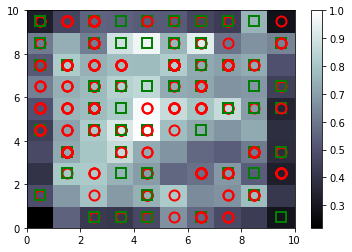

In [16]:
#visualizing the results
from pylab import bone, pcolor, colorbar,plot,show
bone()
pcolor(som.distance_map().T)
colorbar()
#red-for not approved green-for approved
markers=['o','s']
colors=['r','g']
for i,x  in enumerate(X_scaled):
    w=som.winner(x)
    plot(w[0]+0.5,w[1]+0.5,markers[y[i]],markeredgecolor=colors[y[i]],markerfacecolor='None',markersize = 10,
         markeredgewidth = 2)
show()
    

In [20]:
mappings=som.win_map(X_scaled)

In [33]:
fraud=np.concatenate((mappings[(1,2)],mappings[(4,2)]),axis=0)
fraud=sc.inverse_transform(fraud)

In [34]:
print('Fraud Customer IDs')
for i in fraud[:, 0]:
  print(int(i))

Fraud Customer IDs
15767358
15740487
15768342
15748532
15680643
15692137
15668830
15712877
15583067
15676909
15679801
15705506
